In [1]:
# import libraries
import numpy as np
import sys
import psi4
from helper_PFCI import PFHamiltonianGenerator
np.set_printoptions(threshold=sys.maxsize)
#psi4.core.set_output_file('output.dat', False)
import time
from scipy.optimize import curve_fit
from scipy import interpolate
from matplotlib import pyplot as plt
from numpy.polynomial import Chebyshev
from scipy import constants
from numpy.polynomial import Polynomial

In [2]:
# setup basic arguments for qed-ci calculation

# z-matrix for H2
mol_str_H2 = """
Li
H 1 1.546938775510204
symmetry c1
"""

# options for the PFHamiltonian Generator class - include cavity effects
cavity_dict = {
    'omega_value' : 0.12086,
    'lambda_vector' : np.array([0, 0, 0.05]),
    'ci_level' : 'fci',   
    'full_diagonalization' : True,
    'number_of_photons' : 1, #<== this is a minimal photon basis, should explore increasing this 
}

# options for PFHamiltonian Generator class - exclude cavity effects
cavity_free_dict = {
    'omega_value' : 0.0,
    'lambda_vector' : np.array([0, 0, 0.0]),
    'ci_level' : 'fci',   
    'full_diagonalization' : True,
    'number_of_photons' : 0, 
}



In [3]:
mol_tmpl = """
Li
H 1 **R**
symmetry c1
"""
options_dict = {
    "basis": "sto-3g",
    "scf_type": "pk",
    "e_convergence": 1e-10,
    "d_convergence": 1e-10,
    'num_roots' : 2
}
r_data = np.linspace(1.25, 1.75, 50)
psi4.set_options(options_dict)
fci_S0 = []
fci_S1 = []
for r in r_data:
    mol_str = mol_tmpl.replace("**R**", str(r))
    mol = psi4.geometry(mol_str)
    scf_e, wfn = psi4.energy('SCF', return_wfn=True)
    fci_energy, wfn = psi4.energy('fci',ref_wfn=wfn, return_wfn=True)
    fci_S0.append(wfn.variable("CI ROOT 0 TOTAL ENERGY"))
    fci_S1.append(wfn.variable("CI ROOT 1 TOTAL ENERGY"))


Scratch directory: /tmp/
   => Libint2 <=

    Primary   basis highest AM E, G, H:  5, 4, 3
    Auxiliary basis highest AM E, G, H:  6, 5, 4
    Onebody   basis highest AM E, G, H:  6, 5, 4
    Solid Harmonics ordering:            gaussian

*** tstart() called on CHEMYM0V4HTALT
*** at Mon Dec  4 13:25:36 2023

   => Loading Basis Set <=

    Name: STO-3G
    Role: ORBITAL
    Keyword: BASIS
    atoms 1 entry LI         line    31 file /Users/ptolley1/miniforge3/envs/work/share/psi4/basis/sto-3g.gbs 
    atoms 2 entry H          line    19 file /Users/ptolley1/miniforge3/envs/work/share/psi4/basis/sto-3g.gbs 


         ---------------------------------------------------------
                                   SCF
               by Justin Turney, Rob Parrish, Andy Simmonett
                          and Daniel G. A. Smith
                              RHF Reference
                        1 Threads,    500 MiB Core
         ---------------------------------------------------------

  

Properties computed using the SCF density matrix


 Multipole Moments:

 ------------------------------------------------------------------------------------
     Multipole            Electronic (a.u.)      Nuclear  (a.u.)        Total (a.u.)
 ------------------------------------------------------------------------------------

 L = 1.  Multiply by 2.5417464519 to convert [e a0] to [Debye]
 Dipole X            :         -0.0000000            0.0000000           -0.0000000
 Dipole Y            :          0.0000000            0.0000000            0.0000000
 Dipole Z            :         -3.0777259            1.1849666           -1.8927592
 Magnitude           :                                                    1.8927592

 ------------------------------------------------------------------------------------

*** tstop() called on CHEMYM0V4HTALT at Mon Dec  4 13:25:36 2023
Module time:
	user time   =       0.06 seconds =       0.00 minutes
	system time =       0.00 seconds =       0.00 min

  Using in-core PK algorithm.
   Calculation information:
      Number of atoms:                   2
      Number of AO shells:               4
      Number of primitives:             12
      Number of atomic orbitals:         6
      Number of basis functions:         6

      Integral cutoff                 1.00e-12
      Number of threads:                 1

  Performing in-core PK
  Using 462 doubles for integral storage.
  We computed 55 shell quartets total.
  Whereas there are 55 unique shell quartets.

  ==> DiskJK: Disk-Based J/K Matrices <==

    J tasked:                  Yes
    K tasked:                  Yes
    wK tasked:                  No
    Memory [MiB]:              375
    Schwarz Cutoff:          1E-12

    OpenMP threads:              1

  Minimum eigenvalue in the overlap matrix is 2.6992087514E-01.
  Reciprocal condition number of the overlap matrix is 1.5121299522E-01.
    Using symmetric orthogonalization.

  ==> Pre-Iterations <==

  SCF Guess: Superpositio

  ==> Integral Setup <==

  Using in-core PK algorithm.
   Calculation information:
      Number of atoms:                   2
      Number of AO shells:               4
      Number of primitives:             12
      Number of atomic orbitals:         6
      Number of basis functions:         6

      Integral cutoff                 1.00e-12
      Number of threads:                 1

  Performing in-core PK
  Using 462 doubles for integral storage.
  We computed 55 shell quartets total.
  Whereas there are 55 unique shell quartets.

  ==> DiskJK: Disk-Based J/K Matrices <==

    J tasked:                  Yes
    K tasked:                  Yes
    wK tasked:                  No
    Memory [MiB]:              375
    Schwarz Cutoff:          1E-12

    OpenMP threads:              1

  Minimum eigenvalue in the overlap matrix is 2.7388919368E-01.
  Reciprocal condition number of the overlap matrix is 1.5395629385E-01.
    Using symmetric orthogonalization.

  ==> Pre-Iterations <==


  Rotational constants: A = ************  B = 328425.23216  C = 328425.23216 [MHz]
  Nuclear repulsion =    1.201375289088649

  Charge       = 0
  Multiplicity = 1
  Electrons    = 4
  Nalpha       = 2
  Nbeta        = 2

  ==> Algorithm <==

  SCF Algorithm Type is PK.
  DIIS enabled.
  MOM disabled.
  Fractional occupation disabled.
  Guess Type is SAD.
  Energy threshold   = 1.00e-10
  Density threshold  = 1.00e-10
  Integral threshold = 1.00e-12

  ==> Primary Basis <==

  Basis Set: STO-3G
    Blend: STO-3G
    Number of shells: 4
    Number of basis functions: 6
    Number of Cartesian functions: 6
    Spherical Harmonics?: true
    Max angular momentum: 1

  ==> Integral Setup <==

  Using in-core PK algorithm.
   Calculation information:
      Number of atoms:                   2
      Number of AO shells:               4
      Number of primitives:             12
      Number of atomic orbitals:         6
      Number of basis functions:         6

      Integral cutoff      

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:               4
      Number of SO shells:               4
      Number of primitives:             12
      Number of atomic orbitals:         6
      Number of basis functions:         6

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [   6 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 83 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                              Matt L. Leininger
         --------------------


Scratch directory: /tmp/
 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:               4
      Number of SO shells:               4
      Number of primitives:             12
      Number of atomic orbitals:         6
      Number of basis functions:         6

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [   6 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 83 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
 

  Using in-core PK algorithm.
   Calculation information:
      Number of atoms:                   2
      Number of AO shells:               4
      Number of primitives:             12
      Number of atomic orbitals:         6
      Number of basis functions:         6

      Integral cutoff                 1.00e-12
      Number of threads:                 1

  Performing in-core PK
  Using 462 doubles for integral storage.
  We computed 55 shell quartets total.
  Whereas there are 55 unique shell quartets.

  ==> DiskJK: Disk-Based J/K Matrices <==

    J tasked:                  Yes
    K tasked:                  Yes
    wK tasked:                  No
    Memory [MiB]:              375
    Schwarz Cutoff:          1E-12

    OpenMP threads:              1

  Minimum eigenvalue in the overlap matrix is 2.8891366242E-01.
  Reciprocal condition number of the overlap matrix is 1.6439852434E-01.
    Using symmetric orthogonalization.

  ==> Pre-Iterations <==

  SCF Guess: Superpositio

  ==> Integral Setup <==

  Using in-core PK algorithm.
   Calculation information:
      Number of atoms:                   2
      Number of AO shells:               4
      Number of primitives:             12
      Number of atomic orbitals:         6
      Number of basis functions:         6

      Integral cutoff                 1.00e-12
      Number of threads:                 1

  Performing in-core PK
  Using 462 doubles for integral storage.
  We computed 55 shell quartets total.
  Whereas there are 55 unique shell quartets.

  ==> DiskJK: Disk-Based J/K Matrices <==

    J tasked:                  Yes
    K tasked:                  Yes
    wK tasked:                  No
    Memory [MiB]:              375
    Schwarz Cutoff:          1E-12

    OpenMP threads:              1

  Minimum eigenvalue in the overlap matrix is 2.9351638806E-01.
  Reciprocal condition number of the overlap matrix is 1.6761978061E-01.
    Using symmetric orthogonalization.

  ==> Pre-Iterations <==


  Rotational constants: A = ************  B =      9.57758  C =      9.57758 [cm^-1]
  Rotational constants: A = ************  B = 287128.63452  C = 287128.63452 [MHz]
  Nuclear repulsion =    1.123307580772419

  Charge       = 0
  Multiplicity = 1
  Electrons    = 4
  Nalpha       = 2
  Nbeta        = 2

  ==> Algorithm <==

  SCF Algorithm Type is PK.
  DIIS enabled.
  MOM disabled.
  Fractional occupation disabled.
  Guess Type is SAD.
  Energy threshold   = 1.00e-10
  Density threshold  = 1.00e-10
  Integral threshold = 1.00e-12

  ==> Primary Basis <==

  Basis Set: STO-3G
    Blend: STO-3G
    Number of shells: 4
    Number of basis functions: 6
    Number of Cartesian functions: 6
    Spherical Harmonics?: true
    Max angular momentum: 1

  ==> Integral Setup <==

  Using in-core PK algorithm.
   Calculation information:
      Number of atoms:                   2
      Number of AO shells:               4
      Number of primitives:             12
      Number of atomic orbita

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:               4
      Number of SO shells:               4
      Number of primitives:             12
      Number of atomic orbitals:         6
      Number of basis functions:         6

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [   6 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 83 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                              Matt L. Leininger
         --------------------


*** tstop() called on CHEMYM0V4HTALT at Mon Dec  4 13:25:38 2023
Module time:
	user time   =       0.06 seconds =       0.00 minutes
	system time =       0.01 seconds =       0.00 minutes
	total time  =          0 seconds =       0.00 minutes
Total time:
	user time   =       2.14 seconds =       0.04 minutes
	system time =       0.24 seconds =       0.00 minutes
	total time  =          2 seconds =       0.03 minutes

Scratch directory: /tmp/
 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:               4
      Number of SO shells:               4
      Number of primitives:             12
      Number of atomic orbitals:         6
      Number of basis functions:         6

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [   6 ]

 OEINTS: Overlap, kinetic, potential,

  ==> Integral Setup <==

  Using in-core PK algorithm.
   Calculation information:
      Number of atoms:                   2
      Number of AO shells:               4
      Number of primitives:             12
      Number of atomic orbitals:         6
      Number of basis functions:         6

      Integral cutoff                 1.00e-12
      Number of threads:                 1

  Performing in-core PK
  Using 462 doubles for integral storage.
  We computed 55 shell quartets total.
  Whereas there are 55 unique shell quartets.

  ==> DiskJK: Disk-Based J/K Matrices <==

    J tasked:                  Yes
    K tasked:                  Yes
    wK tasked:                  No
    Memory [MiB]:              375
    Schwarz Cutoff:          1E-12

    OpenMP threads:              1

  Minimum eigenvalue in the overlap matrix is 3.1062626519E-01.
  Reciprocal condition number of the overlap matrix is 1.7970639892E-01.
    Using symmetric orthogonalization.

  ==> Pre-Iterations <==


  ==> Integral Setup <==

  Using in-core PK algorithm.
   Calculation information:
      Number of atoms:                   2
      Number of AO shells:               4
      Number of primitives:             12
      Number of atomic orbitals:         6
      Number of basis functions:         6

      Integral cutoff                 1.00e-12
      Number of threads:                 1

  Performing in-core PK
  Using 462 doubles for integral storage.
  We computed 55 shell quartets total.
  Whereas there are 55 unique shell quartets.

  ==> DiskJK: Disk-Based J/K Matrices <==

    J tasked:                  Yes
    K tasked:                  Yes
    wK tasked:                  No
    Memory [MiB]:              375
    Schwarz Cutoff:          1E-12

    OpenMP threads:              1

  Minimum eigenvalue in the overlap matrix is 3.1578220759E-01.
  Reciprocal condition number of the overlap matrix is 1.8338659199E-01.
    Using symmetric orthogonalization.

  ==> Pre-Iterations <==


  Rotational constants: A = ************  B = 253158.20739  C = 253158.20739 [MHz]
  Nuclear repulsion =    1.054766779233762

  Charge       = 0
  Multiplicity = 1
  Electrons    = 4
  Nalpha       = 2
  Nbeta        = 2

  ==> Algorithm <==

  SCF Algorithm Type is PK.
  DIIS enabled.
  MOM disabled.
  Fractional occupation disabled.
  Guess Type is SAD.
  Energy threshold   = 1.00e-10
  Density threshold  = 1.00e-10
  Integral threshold = 1.00e-12

  ==> Primary Basis <==

  Basis Set: STO-3G
    Blend: STO-3G
    Number of shells: 4
    Number of basis functions: 6
    Number of Cartesian functions: 6
    Spherical Harmonics?: true
    Max angular momentum: 1

  ==> Integral Setup <==

  Using in-core PK algorithm.
   Calculation information:
      Number of atoms:                   2
      Number of AO shells:               4
      Number of primitives:             12
      Number of atomic orbitals:         6
      Number of basis functions:         6

      Integral cutoff      

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:               4
      Number of SO shells:               4
      Number of primitives:             12
      Number of atomic orbitals:         6
      Number of basis functions:         6

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [   6 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 83 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                              Matt L. Leininger
         --------------------

	user time   =       0.06 seconds =       0.00 minutes
	system time =       0.00 seconds =       0.00 minutes
	total time  =          0 seconds =       0.00 minutes
Total time:
	user time   =       3.14 seconds =       0.05 minutes
	system time =       0.35 seconds =       0.01 minutes
	total time  =          3 seconds =       0.05 minutes

Scratch directory: /tmp/
 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:               4
      Number of SO shells:               4
      Number of primitives:             12
      Number of atomic orbitals:         6
      Number of basis functions:         6

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [   6 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing 

  ==> Integral Setup <==

  Using in-core PK algorithm.
   Calculation information:
      Number of atoms:                   2
      Number of AO shells:               4
      Number of primitives:             12
      Number of atomic orbitals:         6
      Number of basis functions:         6

      Integral cutoff                 1.00e-12
      Number of threads:                 1

  Performing in-core PK
  Using 462 doubles for integral storage.
  We computed 55 shell quartets total.
  Whereas there are 55 unique shell quartets.

  ==> DiskJK: Disk-Based J/K Matrices <==

    J tasked:                  Yes
    K tasked:                  Yes
    wK tasked:                  No
    Memory [MiB]:              375
    Schwarz Cutoff:          1E-12

    OpenMP threads:              1

  Minimum eigenvalue in the overlap matrix is 3.3466409478E-01.
  Reciprocal condition number of the overlap matrix is 1.9702954991E-01.
    Using symmetric orthogonalization.

  ==> Pre-Iterations <==


    *  16    0.004401  (    1,    2)  1AA 2AB 3AX 
    *  17    0.004401  (    2,    1)  1AB 2AA 3AX 
    *  18   -0.003777  (    2,    2)  2AX 3AX 
    *  19    0.003714  (    2,    0)  1AB 2AX 3AA 
    *  20    0.003714  (    0,    2)  1AA 2AX 3AB 

		 "A good bug is a dead bug" 

			 - Starship Troopers

		 "I didn't write FORTRAN.  That's the problem."

			 - Edward Valeev

Scratch directory: /tmp/
   => Libint2 <=

    Primary   basis highest AM E, G, H:  5, 4, 3
    Auxiliary basis highest AM E, G, H:  6, 5, 4
    Onebody   basis highest AM E, G, H:  6, 5, 4
    Solid Harmonics ordering:            gaussian

*** tstart() called on CHEMYM0V4HTALT
*** at Mon Dec  4 13:25:40 2023

   => Loading Basis Set <=

    Name: STO-3G
    Role: ORBITAL
    Keyword: BASIS
    atoms 1 entry LI         line    31 file /Users/ptolley1/miniforge3/envs/work/share/psi4/basis/sto-3g.gbs 
    atoms 2 entry H          line    19 file /Users/ptolley1/miniforge3/envs/work/share/psi4/basis/sto-3g.gbs 


 

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:               4
      Number of SO shells:               4
      Number of primitives:             12
      Number of atomic orbitals:         6
      Number of basis functions:         6

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [   6 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 83 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                              Matt L. Leininger
         --------------------


Scratch directory: /tmp/
 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:               4
      Number of SO shells:               4
      Number of primitives:             12
      Number of atomic orbitals:         6
      Number of basis functions:         6

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [   6 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 83 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
 

  Using in-core PK algorithm.
   Calculation information:
      Number of atoms:                   2
      Number of AO shells:               4
      Number of primitives:             12
      Number of atomic orbitals:         6
      Number of basis functions:         6

      Integral cutoff                 1.00e-12
      Number of threads:                 1

  Performing in-core PK
  Using 462 doubles for integral storage.
  We computed 55 shell quartets total.
  Whereas there are 55 unique shell quartets.

  ==> DiskJK: Disk-Based J/K Matrices <==

    J tasked:                  Yes
    K tasked:                  Yes
    wK tasked:                  No
    Memory [MiB]:              375
    Schwarz Cutoff:          1E-12

    OpenMP threads:              1

  Minimum eigenvalue in the overlap matrix is 3.5468367609E-01.
  Reciprocal condition number of the overlap matrix is 2.1179994674E-01.
    Using symmetric orthogonalization.

  ==> Pre-Iterations <==

  SCF Guess: Superpositio

    *  15    0.004797  (   12,    0)  1AB 2AB 3AA 6AA 
    *  16   -0.004094  (    1,    2)  1AA 2AB 3AX 
    *  17   -0.004094  (    2,    1)  1AB 2AA 3AX 
    *  18    0.003732  (    2,    2)  2AX 3AX 
    *  19   -0.003610  (    0,    2)  1AA 2AX 3AB 
    *  20   -0.003610  (    2,    0)  1AB 2AX 3AA 

		 "A good bug is a dead bug" 

			 - Starship Troopers

		 "I didn't write FORTRAN.  That's the problem."

			 - Edward Valeev

Scratch directory: /tmp/
   => Libint2 <=

    Primary   basis highest AM E, G, H:  5, 4, 3
    Auxiliary basis highest AM E, G, H:  6, 5, 4
    Onebody   basis highest AM E, G, H:  6, 5, 4
    Solid Harmonics ordering:            gaussian

*** tstart() called on CHEMYM0V4HTALT
*** at Mon Dec  4 13:25:41 2023

   => Loading Basis Set <=

    Name: STO-3G
    Role: ORBITAL
    Keyword: BASIS
    atoms 1 entry LI         line    31 file /Users/ptolley1/miniforge3/envs/work/share/psi4/basis/sto-3g.gbs 
    atoms 2 entry H          line    19 file /Users/ptolley

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:               4
      Number of SO shells:               4
      Number of primitives:             12
      Number of atomic orbitals:         6
      Number of basis functions:         6

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [   6 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 83 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                              Matt L. Leininger
         --------------------

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:               4
      Number of SO shells:               4
      Number of primitives:             12
      Number of atomic orbitals:         6
      Number of basis functions:         6

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [   6 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 83 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                              Matt L. Leininger
         --------------------


Scratch directory: /tmp/
 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:               4
      Number of SO shells:               4
      Number of primitives:             12
      Number of atomic orbitals:         6
      Number of basis functions:         6

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [   6 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 83 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
 

  Using in-core PK algorithm.
   Calculation information:
      Number of atoms:                   2
      Number of AO shells:               4
      Number of primitives:             12
      Number of atomic orbitals:         6
      Number of basis functions:         6

      Integral cutoff                 1.00e-12
      Number of threads:                 1

  Performing in-core PK
  Using 462 doubles for integral storage.
  We computed 55 shell quartets total.
  Whereas there are 55 unique shell quartets.

  ==> DiskJK: Disk-Based J/K Matrices <==

    J tasked:                  Yes
    K tasked:                  Yes
    wK tasked:                  No
    Memory [MiB]:              375
    Schwarz Cutoff:          1E-12

    OpenMP threads:              1

  Minimum eigenvalue in the overlap matrix is 3.8174410707E-01.
  Reciprocal condition number of the overlap matrix is 2.3230726257E-01.
    Using symmetric orthogonalization.

  ==> Pre-Iterations <==

  SCF Guess: Superpositio

  ==> Integral Setup <==

  Using in-core PK algorithm.
   Calculation information:
      Number of atoms:                   2
      Number of AO shells:               4
      Number of primitives:             12
      Number of atomic orbitals:         6
      Number of basis functions:         6

      Integral cutoff                 1.00e-12
      Number of threads:                 1

  Performing in-core PK
  Using 462 doubles for integral storage.
  We computed 55 shell quartets total.
  Whereas there are 55 unique shell quartets.

  ==> DiskJK: Disk-Based J/K Matrices <==

    J tasked:                  Yes
    K tasked:                  Yes
    wK tasked:                  No
    Memory [MiB]:              375
    Schwarz Cutoff:          1E-12

    OpenMP threads:              1

  Minimum eigenvalue in the overlap matrix is 3.8791745638E-01.
  Reciprocal condition number of the overlap matrix is 2.3707774774E-01.
    Using symmetric orthogonalization.

  ==> Pre-Iterations <==


         ---------------------------------------------------------


   ==> Parameters <==

    EX LEVEL       =        4      H0 BLOCKSIZE  =     1000
    VAL EX LEVEL   =        0      H0 GUESS SIZE =     1000
    H0COUPLINGSIZE =        0      H0 COUPLING   =       NO
    MAXITER        =       24      NUM PRINT     =       20
    NUM ROOTS      =        2      ICORE         =        1
    PRINT LVL      =        1      FCI           =      YES
    R CONV         = 1.00e-04      MIXED         =      YES
    E CONV         = 1.00e-10      MIXED4        =      YES
    R4S            =       NO      REPL OTF      =       NO
    DIAG METHOD    =      SEM      FOLLOW ROOT   =        0
    PRECONDITIONER = DAVIDSON      UPDATE        = DAVIDSON
    S              =   0.0000      Ms0           =      YES
    GUESS VECTOR   =  H0BLOCK      OPENTYPE      =     NONE
    COLLAPSE SIZE  =        1      HD AVG        = EVANGELISTI
    MAX NUM VECS   =       50      REF SYM       =     AUTO
    I

In [4]:
mol_tmpl_e = """
Li
H 1 **R**
symmetry c1
"""

r_data_e = np.linspace(1.45, 1.95, 50)
psi4.set_options(options_dict)
fci_S0_e = []
fci_S1_e = []
for r in r_data_e:
    mol_str_e = mol_tmpl.replace("**R**", str(r))
    mol_e = psi4.geometry(mol_str_e)
    scf_e, wfn = psi4.energy('SCF', return_wfn=True)
    fci_energy, wfn = psi4.energy('fci',ref_wfn=wfn, return_wfn=True)
    fci_S0_e.append(wfn.variable("CI ROOT 0 TOTAL ENERGY"))
    fci_S1_e.append(wfn.variable("CI ROOT 1 TOTAL ENERGY"))


Scratch directory: /tmp/
   => Libint2 <=

    Primary   basis highest AM E, G, H:  5, 4, 3
    Auxiliary basis highest AM E, G, H:  6, 5, 4
    Onebody   basis highest AM E, G, H:  6, 5, 4
    Solid Harmonics ordering:            gaussian

*** tstart() called on CHEMYM0V4HTALT
*** at Mon Dec  4 13:25:43 2023

   => Loading Basis Set <=

    Name: STO-3G
    Role: ORBITAL
    Keyword: BASIS
    atoms 1 entry LI         line    31 file /Users/ptolley1/miniforge3/envs/work/share/psi4/basis/sto-3g.gbs 
    atoms 2 entry H          line    19 file /Users/ptolley1/miniforge3/envs/work/share/psi4/basis/sto-3g.gbs 


         ---------------------------------------------------------
                                   SCF
               by Justin Turney, Rob Parrish, Andy Simmonett
                          and Daniel G. A. Smith
                              RHF Reference
                        1 Threads,    500 MiB Core
         ---------------------------------------------------------

  

Properties computed using the SCF density matrix


 Multipole Moments:

 ------------------------------------------------------------------------------------
     Multipole            Electronic (a.u.)      Nuclear  (a.u.)        Total (a.u.)
 ------------------------------------------------------------------------------------

 L = 1.  Multiply by 2.5417464519 to convert [e a0] to [Debye]
 Dipole X            :         -0.0000000            0.0000000           -0.0000000
 Dipole Y            :         -0.0000000            0.0000000           -0.0000000
 Dipole Z            :         -3.2733995            1.3730261           -1.9003733
 Magnitude           :                                                    1.9003733

 ------------------------------------------------------------------------------------

*** tstop() called on CHEMYM0V4HTALT at Mon Dec  4 13:25:44 2023
Module time:
	user time   =       0.06 seconds =       0.00 minutes
	system time =       0.00 seconds =       0.00 min

  ==> Integral Setup <==

  Using in-core PK algorithm.
   Calculation information:
      Number of atoms:                   2
      Number of AO shells:               4
      Number of primitives:             12
      Number of atomic orbitals:         6
      Number of basis functions:         6

      Integral cutoff                 1.00e-12
      Number of threads:                 1

  Performing in-core PK
  Using 462 doubles for integral storage.
  We computed 55 shell quartets total.
  Whereas there are 55 unique shell quartets.

  ==> DiskJK: Disk-Based J/K Matrices <==

    J tasked:                  Yes
    K tasked:                  Yes
    wK tasked:                  No
    Memory [MiB]:              375
    Schwarz Cutoff:          1E-12

    OpenMP threads:              1

  Minimum eigenvalue in the overlap matrix is 3.1474204509E-01.
  Reciprocal condition number of the overlap matrix is 1.8264264917E-01.
    Using symmetric orthogonalization.

  ==> Pre-Iterations <==


  ==> Integral Setup <==

  Using in-core PK algorithm.
   Calculation information:
      Number of atoms:                   2
      Number of AO shells:               4
      Number of primitives:             12
      Number of atomic orbitals:         6
      Number of basis functions:         6

      Integral cutoff                 1.00e-12
      Number of threads:                 1

  Performing in-core PK
  Using 462 doubles for integral storage.
  We computed 55 shell quartets total.
  Whereas there are 55 unique shell quartets.

  ==> DiskJK: Disk-Based J/K Matrices <==

    J tasked:                  Yes
    K tasked:                  Yes
    wK tasked:                  No
    Memory [MiB]:              375
    Schwarz Cutoff:          1E-12

    OpenMP threads:              1

  Minimum eigenvalue in the overlap matrix is 3.1998657304E-01.
  Reciprocal condition number of the overlap matrix is 1.8640150980E-01.
    Using symmetric orthogonalization.

  ==> Pre-Iterations <==


  ==> Integral Setup <==

  Using in-core PK algorithm.
   Calculation information:
      Number of atoms:                   2
      Number of AO shells:               4
      Number of primitives:             12
      Number of atomic orbitals:         6
      Number of basis functions:         6

      Integral cutoff                 1.00e-12
      Number of threads:                 1

  Performing in-core PK
  Using 462 doubles for integral storage.
  We computed 55 shell quartets total.
  Whereas there are 55 unique shell quartets.

  ==> DiskJK: Disk-Based J/K Matrices <==

    J tasked:                  Yes
    K tasked:                  Yes
    wK tasked:                  No
    Memory [MiB]:              375
    Schwarz Cutoff:          1E-12

    OpenMP threads:              1

  Minimum eigenvalue in the overlap matrix is 3.2533746431E-01.
  Reciprocal condition number of the overlap matrix is 1.9025725907E-01.
    Using symmetric orthogonalization.

  ==> Pre-Iterations <==


    FCI Root 0 energy =    -7.882719038757464

   The 20 most important determinants:

    *   1   -0.988149  (    0,    0)  1AX 2AX 
    *   2    0.109152  (   10,   10)  1AX 6AX 
    *   3    0.056078  (    1,   10)  1AX 3AA 6AB 
    *   4    0.056078  (   10,    1)  1AX 3AB 6AA 
    *   5   -0.036654  (    0,    1)  1AX 2AA 3AB 
    *   6   -0.036654  (    1,    0)  1AX 2AB 3AA 
    *   7    0.031971  (    1,    1)  1AX 3AX 
    *   8    0.027926  (    3,    3)  1AX 4AX 
    *   9    0.027926  (    6,    6)  1AX 5AX 
    *  10    0.003760  (    2,    2)  2AX 3AX 
    *  11    0.003226  (    0,   10)  1AX 2AA 6AB 
    *  12    0.003226  (   10,    0)  1AX 2AB 6AA 
    *  13    0.003111  (    3,    4)  1AA 2AB 4AX 
    *  14    0.003111  (    4,    3)  1AB 2AA 4AX 
    *  15    0.003111  (    6,    7)  1AA 2AB 5AX 
    *  16    0.003111  (    7,    6)  1AB 2AA 5AX 
    *  17    0.001795  (    4,    4)  2AX 4AX 
    *  18    0.001795  (    7,    7)  2AX 5AX 
    *  19   -0.000927  (   

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:               4
      Number of SO shells:               4
      Number of primitives:             12
      Number of atomic orbitals:         6
      Number of basis functions:         6

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [   6 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 83 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                              Matt L. Leininger
         --------------------

 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:               4
      Number of SO shells:               4
      Number of primitives:             12
      Number of atomic orbitals:         6
      Number of basis functions:         6

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [   6 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 83 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                           

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:               4
      Number of SO shells:               4
      Number of primitives:             12
      Number of atomic orbitals:         6
      Number of basis functions:         6

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [   6 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 83 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                              Matt L. Leininger
         --------------------

   @RHF iter   8:    -7.86140416961447    0.00000e+00   1.05032e-10 DIIS
   @RHF iter   9:    -7.86140416961448   -7.10543e-15   3.88410e-13 DIIS
  Energy and wave function converged.


  ==> Post-Iterations <==

    Orbital Energies [Eh]
    ---------------------

    Doubly Occupied:                                                      

       1A     -2.349077     2A     -0.284137  

    Virtual:                                                              

       3A      0.078096     4A      0.163946     5A      0.163946  
       6A      0.543988  

    Final Occupation by Irrep:
              A 
    DOCC [     2 ]
    NA   [     2 ]
    NB   [     2 ]

  @RHF Final Energy:    -7.86140416961448

   => Energetics <=

    Nuclear Repulsion Energy =              0.9840487029537003
    One-Electron Energy =                 -12.4244776626971554
    Two-Electron Energy =                   3.5790247901289756
    Total Energy =                         -7.8614041696144792

Computation Comp

  ==> Integral Setup <==

  Using in-core PK algorithm.
   Calculation information:
      Number of atoms:                   2
      Number of AO shells:               4
      Number of primitives:             12
      Number of atomic orbitals:         6
      Number of basis functions:         6

      Integral cutoff                 1.00e-12
      Number of threads:                 1

  Performing in-core PK
  Using 462 doubles for integral storage.
  We computed 55 shell quartets total.
  Whereas there are 55 unique shell quartets.

  ==> DiskJK: Disk-Based J/K Matrices <==

    J tasked:                  Yes
    K tasked:                  Yes
    wK tasked:                  No
    Memory [MiB]:              375
    Schwarz Cutoff:          1E-12

    OpenMP threads:              1

  Minimum eigenvalue in the overlap matrix is 3.5644554093E-01.
  Reciprocal condition number of the overlap matrix is 2.1311573186E-01.
    Using symmetric orthogonalization.

  ==> Pre-Iterations <==


  ==> Integral Setup <==

  Using in-core PK algorithm.
   Calculation information:
      Number of atoms:                   2
      Number of AO shells:               4
      Number of primitives:             12
      Number of atomic orbitals:         6
      Number of basis functions:         6

      Integral cutoff                 1.00e-12
      Number of threads:                 1

  Performing in-core PK
  Using 462 doubles for integral storage.
  We computed 55 shell quartets total.
  Whereas there are 55 unique shell quartets.

  ==> DiskJK: Disk-Based J/K Matrices <==

    J tasked:                  Yes
    K tasked:                  Yes
    wK tasked:                  No
    Memory [MiB]:              375
    Schwarz Cutoff:          1E-12

    OpenMP threads:              1

  Minimum eigenvalue in the overlap matrix is 3.6236545459E-01.
  Reciprocal condition number of the overlap matrix is 2.1755622886E-01.
    Using symmetric orthogonalization.

  ==> Pre-Iterations <==


    ------------   -----------------  -----------------  -----------------  -----------------
         LI           0.000000000000     0.000000000000    -0.210322633279     7.016003436600
         H            0.000000000000     0.000000000000     1.464167162640     1.007825032230

  Running in c1 symmetry.

  Rotational constants: A = ************  B =      6.82242  C =      6.82242 [cm^-1]
  Rotational constants: A = ************  B = 204530.88160  C = 204530.88160 [MHz]
  Nuclear repulsion =    0.948068860066911

  Charge       = 0
  Multiplicity = 1
  Electrons    = 4
  Nalpha       = 2
  Nbeta        = 2

  ==> Algorithm <==

  SCF Algorithm Type is PK.
  DIIS enabled.
  MOM disabled.
  Fractional occupation disabled.
  Guess Type is SAD.
  Energy threshold   = 1.00e-10
  Density threshold  = 1.00e-10
  Integral threshold = 1.00e-12

  ==> Primary Basis <==

  Basis Set: STO-3G
    Blend: STO-3G
    Number of shells: 4
    Number of basis functions: 6
    Number of Cartesian funct

 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:               4
      Number of SO shells:               4
      Number of primitives:             12
      Number of atomic orbitals:         6
      Number of basis functions:         6

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [   6 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 83 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                           

	total time  =          0 seconds =       0.00 minutes
Total time:
	user time   =       8.32 seconds =       0.14 minutes
	system time =       0.92 seconds =       0.02 minutes
	total time  =         11 seconds =       0.18 minutes

Scratch directory: /tmp/
 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:               4
      Number of SO shells:               4
      Number of primitives:             12
      Number of atomic orbitals:         6
      Number of basis functions:         6

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [   6 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 83 non-zero two-electron integrals.
        Stored in file 33.




  ==> Integral Setup <==

  Using in-core PK algorithm.
   Calculation information:
      Number of atoms:                   2
      Number of AO shells:               4
      Number of primitives:             12
      Number of atomic orbitals:         6
      Number of basis functions:         6

      Integral cutoff                 1.00e-12
      Number of threads:                 1

  Performing in-core PK
  Using 462 doubles for integral storage.
  We computed 55 shell quartets total.
  Whereas there are 55 unique shell quartets.

  ==> DiskJK: Disk-Based J/K Matrices <==

    J tasked:                  Yes
    K tasked:                  Yes
    wK tasked:                  No
    Memory [MiB]:              375
    Schwarz Cutoff:          1E-12

    OpenMP threads:              1

  Minimum eigenvalue in the overlap matrix is 3.8359085029E-01.
  Reciprocal condition number of the overlap matrix is 2.3373065974E-01.
    Using symmetric orthogonalization.

  ==> Pre-Iterations <==


   => Loading Basis Set <=

    Name: STO-3G
    Role: ORBITAL
    Keyword: BASIS
    atoms 1 entry LI         line    31 file /Users/ptolley1/miniforge3/envs/work/share/psi4/basis/sto-3g.gbs 
    atoms 2 entry H          line    19 file /Users/ptolley1/miniforge3/envs/work/share/psi4/basis/sto-3g.gbs 


         ---------------------------------------------------------
                                   SCF
               by Justin Turney, Rob Parrish, Andy Simmonett
                          and Daniel G. A. Smith
                              RHF Reference
                        1 Threads,    500 MiB Core
         ---------------------------------------------------------

  ==> Geometry <==

    Molecular point group: c1
    Full point group: C_inf_v

    Geometry (in Angstrom), charge = 0, multiplicity = 1:

       Center              X                  Y                   Z               Mass       
    ------------   -----------------  -----------------  -----------------  -----

 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:               4
      Number of SO shells:               4
      Number of primitives:             12
      Number of atomic orbitals:         6
      Number of basis functions:         6

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [   6 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 83 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                           


Scratch directory: /tmp/
 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:               4
      Number of SO shells:               4
      Number of primitives:             12
      Number of atomic orbitals:         6
      Number of basis functions:         6

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [   6 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 83 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
 

  ==> Integral Setup <==

  Using in-core PK algorithm.
   Calculation information:
      Number of atoms:                   2
      Number of AO shells:               4
      Number of primitives:             12
      Number of atomic orbitals:         6
      Number of basis functions:         6

      Integral cutoff                 1.00e-12
      Number of threads:                 1

  Performing in-core PK
  Using 462 doubles for integral storage.
  We computed 55 shell quartets total.
  Whereas there are 55 unique shell quartets.

  ==> DiskJK: Disk-Based J/K Matrices <==

    J tasked:                  Yes
    K tasked:                  Yes
    wK tasked:                  No
    Memory [MiB]:              375
    Schwarz Cutoff:          1E-12

    OpenMP threads:              1

  Minimum eigenvalue in the overlap matrix is 4.0543877102E-01.
  Reciprocal condition number of the overlap matrix is 2.5081236511E-01.
    Using symmetric orthogonalization.

  ==> Pre-Iterations <==


    *  16    0.003682  (    2,    2)  2AX 3AX 
    *  17   -0.003439  (    1,    2)  1AA 2AB 3AX 
    *  18   -0.003439  (    2,    1)  1AB 2AA 3AX 
    *  19   -0.003390  (    2,    0)  1AB 2AX 3AA 
    *  20   -0.003390  (    0,    2)  1AA 2AX 3AB 

		 "A good bug is a dead bug" 

			 - Starship Troopers

		 "I didn't write FORTRAN.  That's the problem."

			 - Edward Valeev

Scratch directory: /tmp/
   => Libint2 <=

    Primary   basis highest AM E, G, H:  5, 4, 3
    Auxiliary basis highest AM E, G, H:  6, 5, 4
    Onebody   basis highest AM E, G, H:  6, 5, 4
    Solid Harmonics ordering:            gaussian

*** tstart() called on CHEMYM0V4HTALT
*** at Mon Dec  4 13:25:48 2023

   => Loading Basis Set <=

    Name: STO-3G
    Role: ORBITAL
    Keyword: BASIS
    atoms 1 entry LI         line    31 file /Users/ptolley1/miniforge3/envs/work/share/psi4/basis/sto-3g.gbs 
    atoms 2 entry H          line    19 file /Users/ptolley1/miniforge3/envs/work/share/psi4/basis/sto-3g.gbs 


 

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:               4
      Number of SO shells:               4
      Number of primitives:             12
      Number of atomic orbitals:         6
      Number of basis functions:         6

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [   6 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 83 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                              Matt L. Leininger
         --------------------


*** tstop() called on CHEMYM0V4HTALT at Mon Dec  4 13:25:48 2023
Module time:
	user time   =       0.06 seconds =       0.00 minutes
	system time =       0.00 seconds =       0.00 minutes
	total time  =          0 seconds =       0.00 minutes
Total time:
	user time   =       9.86 seconds =       0.16 minutes
	system time =       1.08 seconds =       0.02 minutes
	total time  =         12 seconds =       0.20 minutes

Scratch directory: /tmp/
 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:               4
      Number of SO shells:               4
      Number of primitives:             12
      Number of atomic orbitals:         6
      Number of basis functions:         6

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [   6 ]

 OEINTS: Overlap, kinetic, potential,

  Using in-core PK algorithm.
   Calculation information:
      Number of atoms:                   2
      Number of AO shells:               4
      Number of primitives:             12
      Number of atomic orbitals:         6
      Number of basis functions:         6

      Integral cutoff                 1.00e-12
      Number of threads:                 1

  Performing in-core PK
  Using 462 doubles for integral storage.
  We computed 55 shell quartets total.
  Whereas there are 55 unique shell quartets.

  ==> DiskJK: Disk-Based J/K Matrices <==

    J tasked:                  Yes
    K tasked:                  Yes
    wK tasked:                  No
    Memory [MiB]:              375
    Schwarz Cutoff:          1E-12

    OpenMP threads:              1

  Minimum eigenvalue in the overlap matrix is 4.2769950735E-01.
  Reciprocal condition number of the overlap matrix is 2.6869382727E-01.
    Using symmetric orthogonalization.

  ==> Pre-Iterations <==

  SCF Guess: Superpositio

    ------------   -----------------  -----------------  -----------------  -----------------
         LI           0.000000000000     0.000000000000    -0.237237778305     7.016003436600
         H            0.000000000000     0.000000000000     1.651537731899     1.007825032230

  Running in c1 symmetry.

  Rotational constants: A = ************  B =      5.36219  C =      5.36219 [cm^-1]
  Rotational constants: A = ************  B = 160754.52811  C = 160754.52811 [MHz]
  Nuclear repulsion =    0.840508373511507

  Charge       = 0
  Multiplicity = 1
  Electrons    = 4
  Nalpha       = 2
  Nbeta        = 2

  ==> Algorithm <==

  SCF Algorithm Type is PK.
  DIIS enabled.
  MOM disabled.
  Fractional occupation disabled.
  Guess Type is SAD.
  Energy threshold   = 1.00e-10
  Density threshold  = 1.00e-10
  Integral threshold = 1.00e-12

  ==> Primary Basis <==

  Basis Set: STO-3G
    Blend: STO-3G
    Number of shells: 4
    Number of basis functions: 6
    Number of Cartesian funct

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:               4
      Number of SO shells:               4
      Number of primitives:             12
      Number of atomic orbitals:         6
      Number of basis functions:         6

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [   6 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 83 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                              Matt L. Leininger
         --------------------

 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:               4
      Number of SO shells:               4
      Number of primitives:             12
      Number of atomic orbitals:         6
      Number of basis functions:         6

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [   6 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 83 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                           


Scratch directory: /tmp/
 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:               4
      Number of SO shells:               4
      Number of primitives:             12
      Number of atomic orbitals:         6
      Number of basis functions:         6

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [   6 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 83 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
 

         ---------------------------------------------------------


   ==> Parameters <==

    EX LEVEL       =        4      H0 BLOCKSIZE  =     1000
    VAL EX LEVEL   =        0      H0 GUESS SIZE =     1000
    H0COUPLINGSIZE =        0      H0 COUPLING   =       NO
    MAXITER        =       24      NUM PRINT     =       20
    NUM ROOTS      =        2      ICORE         =        1
    PRINT LVL      =        1      FCI           =      YES
    R CONV         = 1.00e-04      MIXED         =      YES
    E CONV         = 1.00e-10      MIXED4        =      YES
    R4S            =       NO      REPL OTF      =       NO
    DIAG METHOD    =      SEM      FOLLOW ROOT   =        0
    PRECONDITIONER = DAVIDSON      UPDATE        = DAVIDSON
    S              =   0.0000      Ms0           =      YES
    GUESS VECTOR   =  H0BLOCK      OPENTYPE      =     NONE
    COLLAPSE SIZE  =        1      HD AVG        = EVANGELISTI
    MAX NUM VECS   =       50      REF SYM       =     AUTO
    I

In [5]:
# z-matrix for LiH
mol_str_H2 = """
Li
H 1 1.546938775510204
symmetry c1
"""

# let's run a psi4 geometry optimization to get the optimal geometry

# set the options
psi4.set_options(options_dict)

# first set the coordinates in init_string as the molecule's geometry 
mol0_H2 = psi4.geometry(mol_str_H2)

# now capture the psi4 geometry data with the guess coordinates
init_geometry_string_H2 = psi4.core.Molecule.create_psi4_string_from_molecule(mol0_H2)

# run the geometry optimization
psi4.optimize("fci")

guess_geometry_H2 = mol0_H2.geometry()
print(guess_geometry_H2)

guess_string_H2 = psi4.core.Molecule.create_psi4_string_from_molecule(mol0_H2)



Scratch directory: /tmp/

         ----------------------------------------------------------
                                   FINDIF
                     R. A. King and Jonathon Misiewicz
         ----------------------------------------------------------

  Using finite-differences of energies to determine gradients.
    Generating geometries for use with 3-point formula.
    Displacement size will be 5.00e-03.
    Number of atoms is 2.
    Number of symmetric SALCs is 1.
    Translations projected? 1. Rotations projected? 1.
    Number of geometries (including reference) is 3.
 3 displacements needed ...

  //>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>//
  //    FiniteDifference Computations  //
  //<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<//


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.8 release

                         Git: Rev {} zzzzzzz 


    D. G. 


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.8 release

                         Git: Rev {} zzzzzzz 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier, R. M.

     Multipole            Electronic (a.u.)      Nuclear  (a.u.)        Total (a.u.)
 ------------------------------------------------------------------------------------

 L = 1.  Multiply by 2.5417464519 to convert [e a0] to [Debye]
 Dipole X            :          0.0000000            0.0000000            0.0000000
 Dipole Y            :          0.0000000            0.0000000            0.0000000
 Dipole Z            :         -3.3584062            1.4519323           -1.9064740
 Magnitude           :                                                    1.9064740

 ------------------------------------------------------------------------------------

*** tstop() called on CHEMYM0V4HTALT at Mon Dec  4 13:25:52 2023
Module time:
	user time   =       0.06 seconds =       0.00 minutes
	system time =       0.01 seconds =       0.00 minutes
	total time  =          0 seconds =       0.00 minutes
Total time:
	user time   =      11.82 seconds =       0.20 minutes
	system time =       1.27 secon

In [6]:
# set the options
psi4.set_options(options_dict)

# first set the coordinates in guess_string as the molecule's geometry 
mol_H2 = psi4.geometry(mol_str_H2)

# now capture the psi4 geometry data with the guess coordinates
guess_geometry_string_H2 = psi4.core.Molecule.create_psi4_string_from_molecule(mol_H2)

# run the geometry optimization
psi4.optimize("fci")

opt_geometry = mol_H2.geometry()

# capture the psi4 geometry data from the optimization
opt_geometry_string_H2 = psi4.core.Molecule.create_psi4_string_from_molecule(mol_H2)

# run excited-state calculations - get first 5 excited states
n_states = 5

# run psi4 TDSCF at same level of theory as geometry optimization
psi4_rhf_e, wfn_H2 = psi4.frequency("fci/sto-3g", return_wfn=True, molecule=mol_H2,maxiter=50)




Scratch directory: /tmp/

         ----------------------------------------------------------
                                   FINDIF
                     R. A. King and Jonathon Misiewicz
         ----------------------------------------------------------

  Using finite-differences of energies to determine gradients.
    Generating geometries for use with 3-point formula.
    Displacement size will be 5.00e-03.
    Number of atoms is 2.
    Number of symmetric SALCs is 1.
    Translations projected? 1. Rotations projected? 1.
    Number of geometries (including reference) is 3.
 3 displacements needed ...

  //>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>//
  //    FiniteDifference Computations  //
  //<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<//


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.8 release

                         Git: Rev {} zzzzzzz 


    D. G. 


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.8 release

                         Git: Rev {} zzzzzzz 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier, R. M.


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.8 release

                         Git: Rev {} zzzzzzz 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier, R. M.


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.8 release

                         Git: Rev {} zzzzzzz 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier, R. M.


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.8 release

                         Git: Rev {} zzzzzzz 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier, R. M.


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.8 release

                         Git: Rev {} zzzzzzz 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier, R. M.


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.8 release

                         Git: Rev {} zzzzzzz 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier, R. M.


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.8 release

                         Git: Rev {} zzzzzzz 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier, R. M.


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.8 release

                         Git: Rev {} zzzzzzz 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier, R. M.

                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                              Matt L. Leininger
         ---------------------------------------------------------


   ==> Parameters <==

    EX LEVEL       =        4      H0 BLOCKSIZE  =     1000
    VAL EX LEVEL   =        0      H0 GUESS SIZE =     1000
    H0COUPLINGSIZE =        0      H0 COUPLING   =       NO
    MAXITER        =       24      NUM PRINT     =       20
    NUM ROOTS      =        2      ICORE         =        1
    PRINT LVL      =        1      FCI           =      YES
    R CONV         = 1.00e-04      MIXED         =      YES
    E CONV         = 1.00e-10      MIXED4        =      YES
    R4S            =       NO      REPL OTF      =       NO
    DIAG METHOD    =      SEM      FOLLOW ROOT   =        0
    PRECONDITIONER = DAVIDSON      UPDATE        = DAVIDSON
    S              =   0.0000      Ms0           =      YES
    GUESS VECTOR   =  H0BLOC

    Vibrational E           2.406 [kcal/mol]       10.068 [kJ/mol]       0.00383460 [Eh]
  Correction E              3.887 [kcal/mol]       16.265 [kJ/mol]       0.00619506 [Eh]
  Total E, Electronic energy at  298.15 [K]                             -7.87656712 [Eh]

  Enthalpy, H_trans = E_trans + k_B * T
    Electronic H            0.000 [kcal/mol]        0.000 [kJ/mol]       0.00000000 [Eh]
    Translational H         1.481 [kcal/mol]        6.197 [kJ/mol]       0.00236046 [Eh]
    Rotational H            0.592 [kcal/mol]        2.479 [kJ/mol]       0.00094418 [Eh]
    Vibrational H           2.406 [kcal/mol]       10.068 [kJ/mol]       0.00383460 [Eh]
  Correction H              4.480 [kcal/mol]       18.744 [kJ/mol]       0.00713925 [Eh]
  Total H, Enthalpy at  298.15 [K]                                      -7.87562293 [Eh]

  Gibbs free energy, G = H - T * S
    Electronic G            0.000 [kcal/mol]        0.000 [kJ/mol]       0.00000000 [Eh]
    Translational G        -8.119

## Calculation of k
Fit ground state PES of H2 to a quintic polynomial

Calculated value of k is very close to literature value (~$575 N/m$), so I am now conficent that the issue is in $ x_0 $

Min on S0 is 1.5459183673469388
Min on S1 is 1.8581632653061224
         5          4         3         2
-0.1113 x + 0.9902 x - 3.644 x + 6.981 x - 6.916 x - 5.086
147.3644612973646


<function matplotlib.pyplot.show(close=None, block=None)>

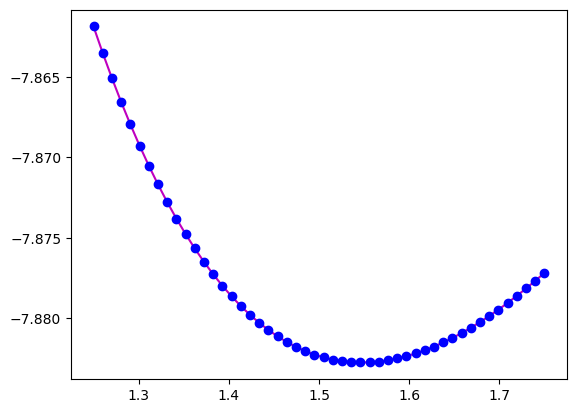

In [7]:
# Constants and Variables
au_to_SI = (4.35974 * 10 ** (-18)) * 10 ** 20
min_S0_loc = np.argmin(fci_S0[:])
min_S1_loc = np.argmin(fci_S1_e[:])
r_eq_ang = r_data[min_S0_loc]
print(f'Min on S0 is {r_data[min_S0_loc]}')
print(f'Min on S1 is {r_data_e[min_S1_loc]}')

# Fitting S0 PES to a quintic polynomial
poly = np.poly1d(np.polyfit(r_data, fci_S0, 5))
print(poly)

#Taking first and second derivative of S0 PES and evaluating at r_eq
first_derivative = poly.deriv()
second_derivative = first_derivative.deriv()
k_test_au = second_derivative(r_eq_ang)
k_test_SI = k_test_au * au_to_SI
print(k_test_SI)

#plotting S0 PES and quintic fit
plt.plot(r_data, poly(r_data), 'm-', label='fit')
plt.plot(r_data, fci_S0[:], 'bo', label='cavity free |g>')
plt.show

## Calculation of $ \text{x}_0 $

$$ \frac{\hbar}{2}\sqrt{\frac{k}{\mu}} = \frac{k}{2}(x_0 - x_{eq})^2 + V_0 $$

Expanded, solved for $ x_o $, and found zeros using quadratic formula

In [15]:
mu_amu = 1.00784 * 6.9410 / (1.00784 + 6.9410)
mu_kg = mu_amu  * 10 ** (-3) / (6.022 * 10 ** 23) 
r_eq_SI = r_eq_ang * 10 ** (-10)
h_bar = constants.hbar
V_0_loc = np.argmin(fci_S0)
V_0 = fci_S0[V_0_loc] * 4.35974 * 10 ** (-18)
left = (h_bar / 2) * np.sqrt(k_test_SI / mu_kg)
a = 0.5 * k_test_SI 
b = -k_test_SI * r_eq_SI
c = 0.5 * k_test_SI * (r_eq_SI ** 2) - left
zeros_n = (-b - np.sqrt((b ** 2) - 4 * a * c)) / (2 * a)
zeros_p = (-b + np.sqrt((b ** 2) - 4 * a * c)) / (2 * a)
x0_angstrom = zeros_n * 10 ** 10
x0_au = x0_angstrom / psi4.constants.bohr2angstroms
print(x0_angstrom)

1.3951717387383447


## Calculation of the Huang-Rhys Factor
Huang Rhys factor can be calculated by both

$$ S = 1/2(\Delta x / x_0)^2 \tag{Turner}$$

from the mode anharmonicity paper

and 

$$ S = \frac{m\omega_{vib} \Delta x^2}{2 \hbar} \tag{Hsu}$$

from the polaritonic Huang-Rhys factor paper

In [16]:
# Constants and Variables
x_0 = wfn_H2.frequency_analysis["Xtp0"].data[5] 
delta_au = (r_data_e[min_S1_loc] - r_data[min_S0_loc]) / psi4.constants.bohr2angstroms
delta_m = (r_data_e[min_S1_loc] - r_data[min_S0_loc]) * 10 ** (-10)
delta_angstrom = (r_data_e[min_S1_loc] - r_data[min_S0_loc])
omega_vib = np.sqrt(k_test_SI / mu_kg)
h_bar = constants.hbar

# Turner
S_Turner = 0.5 * (delta_au / x0_au) ** 2

# Hsu
S_Hsu = mu_kg * omega_vib * delta_m ** 2 / (2 * h_bar)

print(S_Turner)
print(S_Hsu)

0.02504409630211572
2.145188646308007


First plot the ground-state potential energy surfaces for $ \text{H}_2 $ inside and outisde the cavity.  The effect of the cavity will raise the energy slightly.

In [ ]:
plt.plot(r_data, fci_S0, label='cavity free |g>')
plt.plot(r_data, fci_S1, label='cavity free |e>')
#plt.plot(r_array, cavity_free_E_array_LiH[:,1], 'b-', label='cavity free LiH |e>')
#plt.plot(r_array, V_fit, label='fit')
#plt.xlim(0.6, 1.45)
plt.legend()
plt.show()